In [18]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

from readimc import MCDFile, TXTFile

import anndata
import pickle

from imread import imread, imsave
import re
import os

In [1]:
%reset -f

In [32]:
df_metadata = pd.read_parquet('/work/FAC/FBM/DBC/mrapsoma/prometex/data/NSCLC/02_processed/metadata/patient_metadata.parquet')
df_metadata

,sample_ID,ImageNumber,CellNumber,Center_X,Center_Y,Area,MajorAxisLength,MinorAxisLength,Compartment,Area_Description,...,Patient_ID,LN.Met,Dist.Met,NeoAdj,Area_px_Stroma,Area_px_Tumour,Area_px_Core,Area_mm_Stroma,Area_mm_Tumour,Area_mm_Core
0,86_A_1,1,4,337.611111,20.500000,18,6.333792,3.709344,1.154769,NaN,...,86_1,No LN Metastases,No Dist. Metastases,NoNeoAdjuvantTherapy,334043,64252,387235,0.334043,0.064252,0.387235
1,86_A_10,2,17,443.000000,44.500000,34,7.469090,5.835142,-22.293001,NaN,...,86_37,No LN Metastases,Dist. Metastases,NoNeoAdjuvantTherapy,115023,126953,187635,0.115023,0.126953,0.187635
2,86_A_100,3,1,287.747126,9.103448,87,11.449097,10.290090,-12.278671,NaN,...,86_8,No LN Metastases,No Dist. Metastases,NoNeoAdjuvantTherapy,71910,77807,121197,0.071910,0.077807,0.121197
3,86_A_101,4,337,483.411765,128.235294,17,5.580791,4.937573,-6.376330,NaN,...,86_12,No LN Metastases,No Dist. Metastases,NoNeoAdjuvantTherapy,84039,358043,386530,0.084039,0.358043,0.386530
4,86_A_102,5,1,293.927273,5.309091,55,9.909857,7.639705,-18.224441,NaN,...,86_16,No LN Metastases,No Dist. Metastases,NoNeoAdjuvantTherapy,155455,259099,376608,0.155455,0.259099,0.376608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2067,86_B_78,76,5,143.039216,34.578431,102,16.177598,8.415367,-218.939397,NaN,...,86_87,LN Metastases,No Dist. Metastases,NoNeoAdjuvantTherapy,15316,13381,16966,0.015316,0.013381,0.016966
2068,88_A_7,97,6,19.197183,78.014085,71,12.257136,8.304182,8.320884,NaN,...,88_362,LN Metastases,No Dist. Metastases,NoNeoAdjuvantTherapy,4957,4837,5754,0.004957,0.004837,0.005754
2069,86_B_82,81,1,301.547170,74.169811,53,9.971515,7.024600,-167.329058,NaN,...,86_103,LN Metastases,No Dist. Metastases,NoNeoAdjuvantTherapy,9677,8190,9929,0.009677,0.008190,0.009929
2070,176_C_30,44,2,345.765957,13.170213,47,10.147034,6.275164,6.620048,NaN,...,Control,NaN,NaN,NaN,84044,353905,360425,0.084044,0.353905,0.360425


In [2]:
df_mcd_ac = pd.read_parquet('/work/FAC/FBM/DBC/mrapsoma/prometex/data/NSCLC/02_processed/mcd_images_ac_idx.parquet')
df_mcd_ac['sample_ID'] = (
    df_mcd_ac['mcd_idx'].astype(str) + '_' +
    df_mcd_ac['TMA_idx'].astype(str) + '_' +
    df_mcd_ac['acquisition_mcd_idx'].astype(str)
)
#df_mcd_ac['sample_ID'] = df_mcd_ac['mcd_idx'] + '_' + df_mcd_ac['TMA_idx'] + '_' + df_mcd_ac['acquisition_mcd_idx']
df_mcd_ac


,mcd_images_idx,acquisition_mcd_idx,mcd_idx,TMA_idx,sample_ID
0,20210104_LC_NSCLC_TMA_176_A,1,176,A,176_A_1
1,20210104_LC_NSCLC_TMA_176_A,2,176,A,176_A_2
2,20210104_LC_NSCLC_TMA_176_A,3,176,A,176_A_3
3,20210104_LC_NSCLC_TMA_176_A,4,176,A,176_A_4
4,20210104_LC_NSCLC_TMA_176_A,5,176,A,176_A_5
...,...,...,...,...,...
2074,2020120_LC_NSCLC_TMA_86_C,99,86,C,86_C_99
2075,2020120_LC_NSCLC_TMA_86_C,100,86,C,86_C_100
2076,2020120_LC_NSCLC_TMA_86_C,102,86,C,86_C_102
2077,2020120_LC_NSCLC_TMA_86_C,105,86,C,86_C_105


In [24]:
merged_df = df_metadata.merge(df_mcd_ac, on='sample_ID', how='outer', indicator=True)

differences = merged_df[merged_df['_merge'] != 'both']
differences

,sample_ID,ImageNumber,CellNumber,Center_X,Center_Y,Area,MajorAxisLength,MinorAxisLength,Compartment,Area_Description,...,Area_px_Tumour,Area_px_Core,Area_mm_Stroma,Area_mm_Tumour,Area_mm_Core,mcd_images_idx,acquisition_mcd_idx,mcd_idx,TMA_idx,_merge
681,176_C_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,20210109_LC_NSCLC_TMA_176_C,2,176,C,right_only
1231,86_B_24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2020117_LC_NSCLC_TMA_86_B,24,86,B,right_only
1431,87_A_49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2020121_LC_NSCLC_TMA_87_A,49,87,A,right_only
1735,88_A_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,20210129_LC_NSCLC_TMA_88_A,1,88,A,right_only
1781,88_A_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,20210129_LC_NSCLC_TMA_88_A,2,88,A,right_only
1792,88_A_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,20210129_LC_NSCLC_TMA_88_A,3,88,A,right_only
1803,88_A_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,20210129_LC_NSCLC_TMA_88_A,4,88,A,right_only


# Table of Contents

1. [Store Patient and Sample IDs](#1.-Store-Patient-and-Sample-IDs)
2. [Store Mask IDs](#2.-Store-Mask-IDs)
3. [Store Image IDs](#3.-Store-Image-IDs)
4. [Check identical masks](#4.-Check-identical-masks)
5. [Check images, masks matching](#5.-Check-images,-masks-matching)


# 1. Store Patient and Sample IDs

Store sample IDs based on the sce object 

In [2]:
ad = anndata.read_h5ad('/work/FAC/FBM/DBC/mrapsoma/prometex/data/NSCLC/02_processed/sce_objects/sce.h5ad')

In [3]:
# create column in anndata obs with sample id based on TmaID TmaBlock and acID
ad.obs["sample_ID"] = ad.obs["TmaID"].astype(str) + "_" + ad.obs["TmaBlock"].astype(str) + "_" + ad.obs["acID"].astype(str)

In [4]:
len(np.unique(ad.obs['sample_ID']))

2072

In [7]:
ad.obs.columns

Index(['ImageNumber', 'CellNumber', 'Center_X', 'Center_Y', 'Area',
       'MajorAxisLength', 'MinorAxisLength', 'Compartment', 'Area_Description',
       'BatchID', 'Panel', 'TmaID', 'TmaBlock', 'acID', 'CellID', 'mclust',
       'TMA', 'Tma_ac', 'cell_category', 'cell_type', 'cell_subtype', 'ROI_xy',
       'RoiID', 'Patient_Nr', 'X..spots', 'DX.name', 'x.y.localisation', 'Age',
       'Gender', 'Typ', 'Grade', 'Size', 'Vessel', 'Pleura', 'T.new', 'N',
       'M.new', 'Stage', 'R', 'Chemo', 'Radio', 'Chemo3', 'Radio4', 'Relapse',
       'Chemo5', 'Radio6', 'DFS', 'Ev.O', 'OS', 'Smok', 'Nikotin', 'ROI',
       'Patient_ID', 'LN.Met', 'Dist.Met', 'NeoAdj', 'Area_px_Stroma',
       'Area_px_Tumour', 'Area_px_Core', 'Area_mm_Stroma', 'Area_mm_Tumour',
       'Area_mm_Core', 'sample_ID'],
      dtype='object')

In [7]:
# need to store in a txt file unique sample_IDs and its associated patient ID 

unique_samples = ad.obs[['sample_ID', 'Patient_ID']].drop_duplicates()

unique_samples.to_csv('SampleIDs_PatientIDs.txt', sep='\t', index=False)

In [6]:
ad.obs.columns

Index(['ImageNumber', 'CellNumber', 'Center_X', 'Center_Y', 'Area',
       'MajorAxisLength', 'MinorAxisLength', 'Compartment', 'Area_Description',
       'BatchID', 'Panel', 'TmaID', 'TmaBlock', 'acID', 'CellID', 'mclust',
       'TMA', 'Tma_ac', 'cell_category', 'cell_type', 'cell_subtype', 'ROI_xy',
       'RoiID', 'Patient_Nr', 'X..spots', 'DX.name', 'x.y.localisation', 'Age',
       'Gender', 'Typ', 'Grade', 'Size', 'Vessel', 'Pleura', 'T.new', 'N',
       'M.new', 'Stage', 'R', 'Chemo', 'Radio', 'Chemo3', 'Radio4', 'Relapse',
       'Chemo5', 'Radio6', 'DFS', 'Ev.O', 'OS', 'Smok', 'Nikotin', 'ROI',
       'Patient_ID', 'LN.Met', 'Dist.Met', 'NeoAdj', 'Area_px_Stroma',
       'Area_px_Tumour', 'Area_px_Core', 'Area_mm_Stroma', 'Area_mm_Tumour',
       'Area_mm_Core', 'sample_ID'],
      dtype='object')

In [11]:
columns_to_keep = ['sample_ID', 'Patient_ID', 'Age', 'Gender', 'Typ', 'Grade', 'Relapse', 'Smok', 'Nikotin', 'NeoAdj']

df_unique = ad.obs[columns_to_keep].drop_duplicates(subset=['sample_ID'])
df_unique.reset_index(drop=True, inplace=True)
df_unique


,sample_ID,Patient_ID,Age,Gender,Typ,Grade,Relapse,Smok,Nikotin,NeoAdj
0,86_A_1,86_1,69,1,0,2,0,3,-2147483648,NoNeoAdjuvantTherapy
1,86_A_10,86_37,46,1,0,2,1,1,10,NoNeoAdjuvantTherapy
2,86_A_100,86_8,55,1,0,2,1,2,90,NoNeoAdjuvantTherapy
3,86_A_101,86_12,66,1,1,2,1,3,-2147483648,NoNeoAdjuvantTherapy
4,86_A_102,86_16,56,1,0,2,1,1,28,NoNeoAdjuvantTherapy
...,...,...,...,...,...,...,...,...,...,...
2067,86_B_78,86_87,73,2,0,1,1,0,-2147483648,NoNeoAdjuvantTherapy
2068,88_A_7,88_362,69,1,1,2,0,1,80,NoNeoAdjuvantTherapy
2069,86_B_82,86_103,67,1,0,3,1,1,100,NoNeoAdjuvantTherapy
2070,176_C_30,Control,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648,-2147483648,NaN


In [ ]:
# store unique sample IDs with associated patient metadata in a parquet file
columns_order = ['sample_ID'] + [col for col in ad.obs.columns if col != 'sample_ID']
patient_metadata = ad.obs.drop_duplicates(subset=['sample_ID'], keep='first')
patient_metadata = patient_metadata[columns_order]
patient_metadata.reset_index(drop=True, inplace=True)
patient_metadata.to_parquet('patient_metadata.parquet')
patient_metadata

,sample_ID,ImageNumber,CellNumber,Center_X,Center_Y,Area,MajorAxisLength,MinorAxisLength,Compartment,Area_Description,...,Patient_ID,LN.Met,Dist.Met,NeoAdj,Area_px_Stroma,Area_px_Tumour,Area_px_Core,Area_mm_Stroma,Area_mm_Tumour,Area_mm_Core
0,86_A_1,1,4,337.611111,20.500000,18,6.333792,3.709344,1.154769,NaN,...,86_1,No LN Metastases,No Dist. Metastases,NoNeoAdjuvantTherapy,334043,64252,387235,0.334043,0.064252,0.387235
1,86_A_10,2,17,443.000000,44.500000,34,7.469090,5.835142,-22.293001,NaN,...,86_37,No LN Metastases,Dist. Metastases,NoNeoAdjuvantTherapy,115023,126953,187635,0.115023,0.126953,0.187635
2,86_A_100,3,1,287.747126,9.103448,87,11.449097,10.290090,-12.278671,NaN,...,86_8,No LN Metastases,No Dist. Metastases,NoNeoAdjuvantTherapy,71910,77807,121197,0.071910,0.077807,0.121197
3,86_A_101,4,337,483.411765,128.235294,17,5.580791,4.937573,-6.376330,NaN,...,86_12,No LN Metastases,No Dist. Metastases,NoNeoAdjuvantTherapy,84039,358043,386530,0.084039,0.358043,0.386530
4,86_A_102,5,1,293.927273,5.309091,55,9.909857,7.639705,-18.224441,NaN,...,86_16,No LN Metastases,No Dist. Metastases,NoNeoAdjuvantTherapy,155455,259099,376608,0.155455,0.259099,0.376608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2067,86_B_78,76,5,143.039216,34.578431,102,16.177598,8.415367,-218.939397,NaN,...,86_87,LN Metastases,No Dist. Metastases,NoNeoAdjuvantTherapy,15316,13381,16966,0.015316,0.013381,0.016966
2068,88_A_7,97,6,19.197183,78.014085,71,12.257136,8.304182,8.320884,NaN,...,88_362,LN Metastases,No Dist. Metastases,NoNeoAdjuvantTherapy,4957,4837,5754,0.004957,0.004837,0.005754
2069,86_B_82,81,1,301.547170,74.169811,53,9.971515,7.024600,-167.329058,NaN,...,86_103,LN Metastases,No Dist. Metastases,NoNeoAdjuvantTherapy,9677,8190,9929,0.009677,0.008190,0.009929
2070,176_C_30,44,2,345.765957,13.170213,47,10.147034,6.275164,6.620048,NaN,...,Control,NaN,NaN,NaN,84044,353905,360425,0.084044,0.353905,0.360425


# 2. Store Mask IDs

In [23]:
directory = '/work/FAC/FBM/DBC/mrapsoma/prometex/data/NSCLC/02_processed/Cell_masks_copy/renamed_masks_all'


file_names = []

for file in os.listdir(directory):
    if file.endswith('.tiff'): 
        file_names.append(file[:-5])  

output_file = 'masks_IDs.txt'

with open(output_file, 'w') as f:
    for name in file_names:
        f.write(name + '\n')

print(f"Filenames have been saved to {output_file}")

Filenames have been saved to masks_IDs.txt


# 3. Store Image IDs

In [24]:
directory = '/work/FAC/FBM/DBC/mrapsoma/prometex/data/NSCLC/01_raw/raw/img'

pattern = r'86_([A-C])_(\d+)' 


with open('imgs_ID.txt', 'w') as f:

    for filename in os.listdir(directory):

        if filename.endswith('.tiff'):

            match = re.search(pattern, filename)
            if match:

                letter = match.group(1)
                number = int(match.group(2))  
                pattern_str = f"86_{letter}_{number}"  
                f.write(pattern_str + '\n')


In [3]:
df_imgs_ID = pd.read_csv('imgs_ID.txt', header=None, names=['imgs_ID'])
df_masks_ID = pd.read_csv('masks_IDs.txt', header=None, names=['masks_ID'])
df_sample_ID = pd.read_csv('SampleIDs_PatientIDs.txt', sep='\t')


In [4]:
df_masks_ID

,masks_ID
0,88_A_100
1,176_C_34
2,87_A_86
3,178_C_30
4,175_B_47
...,...
1817,88_B_103
1818,88_B_121
1819,86_A_33
1820,176_C_65


In [5]:
df_sample_ID

,sample_ID,Patient_ID
0,86_A_1,86_1
1,86_A_10,86_37
2,86_A_100,86_8
3,86_A_101,86_12
4,86_A_102,86_16
...,...,...
2067,86_B_78,86_87
2068,88_A_7,88_362
2069,86_B_82,86_103
2070,176_C_30,Control


In [ ]:
df_aligned = pd.merge(df_masks_ID, df_sample_ID, how='outer', left_on='imgs_ID', right_on='masks_ID')

df_aligned

,imgs_ID,masks_ID
0,NaN,175_A_1
1,NaN,175_A_10
2,NaN,175_A_100
3,NaN,175_A_102
4,NaN,175_A_103
...,...,...
1817,NaN,88_C_95
1818,NaN,88_C_96
1819,NaN,88_C_97
1820,NaN,88_C_98


In [11]:
df_merged = pd.merge(df_masks_ID, df_sample_ID, left_on='masks_ID', right_on='sample_ID', how='outer')
df_merged

,masks_ID,sample_ID,Patient_ID
0,175_A_1,175_A_1,175_1
1,175_A_10,175_A_10,175_41
2,175_A_100,175_A_100,175_59
3,175_A_102,175_A_102,175_63
4,175_A_103,175_A_103,175_4
...,...,...,...
2073,88_C_95,88_C_95,88_505
2074,88_C_96,88_C_96,88_509
2075,88_C_97,88_C_97,88_513
2076,88_C_98,88_C_98,88_517


In [13]:
df_with_nan = df_merged[df_merged.isna().any(axis=1)]
df_with_nan

,masks_ID,sample_ID,Patient_ID
395,NaN,176_A_1,176_193
396,NaN,176_A_10,176_229
397,NaN,176_A_100,176_208
398,NaN,176_A_101,176_212
399,NaN,176_A_102,176_216
...,...,...,...
1231,86_B_24,NaN,NaN
1734,88_A_1,NaN,NaN
1780,88_A_2,NaN,NaN
1791,88_A_3,NaN,NaN


# 4. Check identical masks

In [20]:
# Define directories
dir1 = "/work/FAC/FBM/DBC/mrapsoma/prometex/data/NSCLC/01_raw/Cell_masks/86_B_mask/"
dir2 = "/work/FAC/FBM/DBC/mrapsoma/prometex/data/NSCLC/01_raw/Cell_masks/86_C_mask/"

# Get list of files in both directories
files1 = set(os.listdir(dir1))
files2 = set(os.listdir(dir2))
renamed_files = {file: file.replace("_new.tiff", ".tiff") for file in files2}
second_names = list(renamed_files.values())
second_names

# Find common files (files that exist in both directories)
common_files = files1.intersection(second_names)

print(common_files)

# Compare images
for file in common_files:
    path1 = os.path.join(dir1, file)
    path2 = os.path.join(dir2, file.replace('.tiff', '_new.tiff'))

    # Open images
    img1 = Image.open(path1)
    img2 = Image.open(path2)

    # Convert to numpy arrays
    arr1 = np.array(img1)
    arr2 = np.array(img2)

    # Check if images are exactly the same
    if np.array_equal(arr1, arr2):
        print(f"{file}: ✅ Identical")
    else:
        print(f"{file}: ❌ Different")

{'2020120_LC_NSCLC_TMA_86_C_s0_a47_ac_ilastik_s2_Probabilitiescells_mask.tiff', '2020120_LC_NSCLC_TMA_86_C_s0_a98_ac_ilastik_s2_Probabilitiescells_mask.tiff', '2020120_LC_NSCLC_TMA_86_C_s0_a90_ac_ilastik_s2_Probabilitiescells_mask.tiff', '2020120_LC_NSCLC_TMA_86_C_s0_a39_ac_ilastik_s2_Probabilitiescells_mask.tiff', '2020120_LC_NSCLC_TMA_86_C_s0_a88_ac_ilastik_s2_Probabilitiescells_mask.tiff', '2020120_LC_NSCLC_TMA_86_C_s0_a71_ac_ilastik_s2_Probabilitiescells_mask.tiff', '2020120_LC_NSCLC_TMA_86_C_s0_a26_ac_ilastik_s2_Probabilitiescells_mask.tiff', '2020120_LC_NSCLC_TMA_86_C_s0_a53_ac_ilastik_s2_Probabilitiescells_mask.tiff', '2020120_LC_NSCLC_TMA_86_C_s0_a31_ac_ilastik_s2_Probabilitiescells_mask.tiff', '2020120_LC_NSCLC_TMA_86_C_s0_a100_ac_ilastik_s2_Probabilitiescells_mask.tiff', '2020120_LC_NSCLC_TMA_86_C_s0_a35_ac_ilastik_s2_Probabilitiescells_mask.tiff', '2020120_LC_NSCLC_TMA_86_C_s0_a3_ac_ilastik_s2_Probabilitiescells_mask.tiff', '2020120_LC_NSCLC_TMA_86_C_s0_a91_ac_ilastik_s2_Pro

In [5]:
dir1 = '/work/FAC/FBM/DBC/mrapsoma/prometex/data/NSCLC/01_raw/Cell_masks/178_B_mask/'
dir2 = '/work/FAC/FBM/DBC/mrapsoma/prometex/data/NSCLC/01_raw/Cell_masks/176_B_mask/'

# Get list of files
files1 = set(os.listdir(dir1))
files2 = set(os.listdir(dir2))

# Find common files
common_files = files1.intersection(files2)

# Compare images
for file in common_files:
    path1 = os.path.join(dir1, file)
    path2 = os.path.join(dir2, file)

    # Open images
    img1 = Image.open(path1)
    img2 = Image.open(path2)

    # Convert to numpy arrays
    arr1 = np.array(img1)
    arr2 = np.array(img2)

    # Check if images are exactly the same
    if np.array_equal(arr1, arr2):
        print(f"{file}: ✅ Identical")
    else:
        print(f"{file}: ❌ Different")

20210112_LC_NSCLC_TMA_176_B_s0_a1_ac_ilastik_s2_Probabilitiescells_mask.tiff: ✅ Identical
20210112_LC_NSCLC_TMA_176_B_s0_a72_ac_ilastik_s2_Probabilitiescells_mask.tiff: ✅ Identical
20210112_LC_NSCLC_TMA_176_B_s0_a62_ac_ilastik_s2_Probabilitiescells_mask.tiff: ✅ Identical
20210112_LC_NSCLC_TMA_176_B_s0_a12_ac_ilastik_s2_Probabilitiescells_mask.tiff: ✅ Identical
20210112_LC_NSCLC_TMA_176_B_s0_a117_ac_ilastik_s2_Probabilitiescells_mask.tiff: ✅ Identical
20210112_LC_NSCLC_TMA_176_B_s0_a100_ac_ilastik_s2_Probabilitiescells_mask.tiff: ✅ Identical
20210112_LC_NSCLC_TMA_176_B_s0_a65_ac_ilastik_s2_Probabilitiescells_mask.tiff: ✅ Identical
20210112_LC_NSCLC_TMA_176_B_s0_a7_ac_ilastik_s2_Probabilitiescells_mask.tiff: ✅ Identical
20210112_LC_NSCLC_TMA_176_B_s0_a54_ac_ilastik_s2_Probabilitiescells_mask.tiff: ✅ Identical
20210112_LC_NSCLC_TMA_176_B_s0_a49_ac_ilastik_s2_Probabilitiescells_mask.tiff: ✅ Identical
20210112_LC_NSCLC_TMA_176_B_s0_a102_ac_ilastik_s2_Probabilitiescells_mask.tiff: ✅ Identica

In [2]:
directory = "/work/FAC/FBM/DBC/mrapsoma/prometex/data/NSCLC/01_raw/raw/panels_steinbock"

# Get all CSV file paths
csv_files = sorted([os.path.join(directory, f) for f in os.listdir(directory) if f.endswith(".csv")])

# Load all CSVs into a list of DataFrames
dfs = [pd.read_csv(f) for f in csv_files]

# Check if all DataFrames are equal
reference_df = dfs[0]  # Take the first file as reference
all_equal = all(reference_df.equals(df) for df in dfs[1:])

if all_equal:
    print("✅ All panel CSVs are identical.")
else:
    print("❌ Panel CSVs are different.")

# Optional: Print differences
for i, df in enumerate(dfs[1:], start=1):
    if not reference_df.equals(df):
        print(f"⚠️ Differences found in {csv_files[i]}")

✅ All panel CSVs are identical.


In [4]:
df_panel = pd.read_csv('/work/FAC/FBM/DBC/mrapsoma/prometex/data/NSCLC/01_raw/raw/panels_steinbock/178_A_panel.csv')

In [5]:
# keep relevant rows with clean target in it 
df_panel.dropna(subset=['Clean_Target'])

,channel,name,keep,ilastik,deepcell,cellpose,Tube Number,Antibody Clone,Stock Concentration,Final Concentration / Dilution,uL to add,800 ul,Clean_Target
13,Y89,Myeloperoxidase MPO,1,NaN,NaN,NaN,2130.0,Polyclonal MPO,500.0,5 ug/mL,1.000000,8.000000,Myeloperoxidase (MPO)
37,In113,FSP1 / S100A4,1,NaN,NaN,NaN,2297.0,EPR2761(2),500.0,6 ug/mL,1.200000,9.600000,FSP1 / S100A4
39,In115,SMA,1,1.0,NaN,NaN,2219.0,1A4,500.0,2 ug/mL,0.400000,3.200000,SMA
64,Pr141,Histone H3,1,2.0,NaN,NaN,1931.0,D1H2,500.0,1 ug/mL,0.200000,1.600000,Histone H3
65,Nd142,fap,1,NaN,NaN,NaN,2298.0,polyclonal_FAP,500.0,6 ug/mL,1.200000,9.600000,FAP
66,Nd143,HLA-DR,1,NaN,NaN,NaN,2272.0,TAL 1B5,500.0,1 ug/mL,0.200000,1.600000,HLA-DR
67,Nd144,CD146,1,NaN,NaN,NaN,2201.0,Polyclonal_MCAM/CD146_RnD_AF932,500.0,4 ug/mL,0.800000,6.400000,CD146
68,Nd145,Cadherin-11,1,NaN,NaN,NaN,2027.0,283416,500.0,5 ug/mL,1.000000,8.000000,Cadherin-11
69,Nd146,Carbonic Anhydrase IX,1,NaN,NaN,NaN,1891.0,polyclonal_CA9_AF2188,500.0,5 ug/mL,1.000000,8.000000,Carbonic Anhydrase IX
70,Sm147,Collagen I / Fibronectin,1,NaN,NaN,NaN,1702.0,Polyclonal_Collagen I,500.0,4 ug/mL,0.800000,6.400000,Collagen I + Fibronectin


In [ ]:
df_panel.rename(columns={'channel': 'mass_channel'})

# 5. Check images, masks matching

In [23]:
image_dir = '/work/FAC/FBM/DBC/mrapsoma/prometex/data/NSCLC/02_processed/tiff_imgs/'
image_files = [f for f in os.listdir(image_dir) if f.endswith('.tiff')]
image_ids = [filename.split('.')[0] for filename in image_files]

df_images_ID = pd.DataFrame(image_ids, columns=['img_ID'])

In [24]:
df_images_ID

,img_ID
0,88_A_100
1,176_C_34
2,176_A_64
3,176_A_128
4,87_A_86
...,...
2074,176_A_76
2075,86_A_33
2076,176_C_65
2077,86_A_97


In [25]:
mask_dir = '/work/FAC/FBM/DBC/mrapsoma/prometex/data/NSCLC/02_processed/masks_all/'
masks_files = [f for f in os.listdir(mask_dir) if f.endswith('.tiff')]
masks_ids = [filename.split('.')[0] for filename in masks_files]

df_masks_ID = pd.DataFrame(masks_ids, columns=['mask_ID'])
df_masks_ID

,mask_ID
0,88_A_100
1,176_C_34
2,87_A_86
3,178_C_30
4,175_B_47
...,...
1817,88_B_103
1818,88_B_121
1819,86_A_33
1820,176_C_65


In [26]:
adata_dir = '/work/FAC/FBM/DBC/mrapsoma/prometex/data/NSCLC/02_processed/export/anndata_graphs_all/'
adata_files = [f for f in os.listdir(adata_dir) if f.endswith('.pkl')]
adata_ids = [filename.split('.')[0] for filename in adata_files]

df_adata_ID = pd.DataFrame(adata_ids, columns=['adata_ID'])
df_adata_ID


,adata_ID
0,87_C_18
1,87_B_96
2,178_A_25
3,88_A_8
4,176_B_36
...,...
1811,88_C_38
1812,176_B_123
1813,178_C_66
1814,175_C_106


In [27]:
with open('/work/FAC/FBM/DBC/mrapsoma/prometex/data/NSCLC/02_processed/export/anndata_graphs_all/87_C_18.pkl', 'rb') as f :
    ad = pickle.load(f)

ad.obs['cell_type'].values.unique

<bound method Categorical.unique of ['SMA_CAF', 'SMA_CAF', 'SMA_CAF', 'Collagen_CAF', 'SMA_CAF', ..., 'Other', 'Other', 'Other', 'Other', 'Other']
Length: 375
Categories (14, object): ['Bcell', 'Blood', 'CD4', 'CD8', ..., 'hypoxic', 'mCAF', 'normal', 'vCAF']>

In [28]:
merged_df = pd.merge(df_images_ID, df_masks_ID, left_on='img_ID', right_on='mask_ID', how='outer')
merged_df

,img_ID,mask_ID
0,175_A_1,175_A_1
1,175_A_10,175_A_10
2,175_A_100,175_A_100
3,175_A_102,175_A_102
4,175_A_103,175_A_103
...,...,...
2075,88_C_95,88_C_95
2076,88_C_96,88_C_96
2077,88_C_97,88_C_97
2078,88_C_98,88_C_98


In [29]:
merged_df[merged_df.isna().any(axis=1)]

,img_ID,mask_ID
395,176_A_1,NaN
396,176_A_10,NaN
397,176_A_100,NaN
398,176_A_101,NaN
399,176_A_102,NaN
...,...,...
1001,178_B_96,NaN
1002,178_B_97,NaN
1003,178_B_98,NaN
1004,178_B_99,NaN


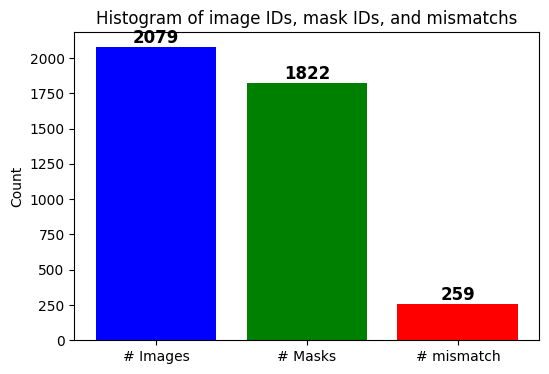

In [30]:
nb_images = merged_df['img_ID'].count()   
nb_masks = merged_df['mask_ID'].count()  
nb_nans = merged_df.isna().any(axis=1).sum()  

counts = [nb_images, nb_masks, nb_nans]
labels = ['# Images', '# Masks', '# mismatch']

plt.figure(figsize=(6, 4))
bars = plt.bar(labels, counts, color=['blue', 'green', 'red'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), 
             ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.ylabel('Count')
plt.title('Histogram of image IDs, mask IDs, and mismatchs')

plt.show()

In [36]:
df_metadata = pd.read_parquet('/work/FAC/FBM/DBC/mrapsoma/prometex/data/NSCLC/02_processed/metadata/patient_metadata.parquet')
df_metadata_patients = df_metadata[['sample_ID', 'Patient_ID']]
df_metadata_patients

,sample_ID,Patient_ID
0,86_A_1,86_1
1,86_A_10,86_37
2,86_A_100,86_8
3,86_A_101,86_12
4,86_A_102,86_16
...,...,...
2067,86_B_78,86_87
2068,88_A_7,88_362
2069,86_B_82,86_103
2070,176_C_30,Control


In [37]:
merged_df = df_images_ID.merge(df_metadata_patients, left_on='img_ID', right_on='sample_ID', how='outer')
merged_df

,img_ID,sample_ID,Patient_ID
0,175_A_1,175_A_1,175_1
1,175_A_10,175_A_10,175_41
2,175_A_100,175_A_100,175_59
3,175_A_102,175_A_102,175_63
4,175_A_103,175_A_103,175_4
...,...,...,...
2074,88_C_95,88_C_95,88_505
2075,88_C_96,88_C_96,88_509
2076,88_C_97,88_C_97,88_513
2077,88_C_98,88_C_98,88_517


In [38]:
merged_df[merged_df.isna().any(axis=1)]

,img_ID,sample_ID,Patient_ID
681,176_C_2,NaN,NaN
1231,86_B_24,NaN,NaN
1431,87_A_49,NaN,NaN
1735,88_A_1,NaN,NaN
1781,88_A_2,NaN,NaN
1792,88_A_3,NaN,NaN
1803,88_A_4,NaN,NaN


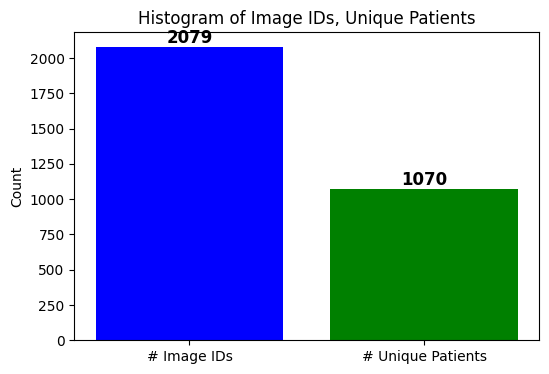

In [41]:
nb_images = merged_df['img_ID'].count()
nb_unique_patients = merged_df['Patient_ID'].nunique() -1

counts = [nb_images, nb_unique_patients]
labels = ['# Image IDs', '# Unique Patients']

plt.figure(figsize=(6, 4))
bars = plt.bar(labels, counts, color=['blue', 'green'])

# name of one patient is just ocntrol and is not actually a patient 

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), 
             ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.ylabel('Count')
plt.title('Histogram of Image IDs, Unique Patients')

plt.show()